In [1]:
import pandas as pd
df1 = pd.read_csv("Smallbox.csv")

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go
import numpy as np

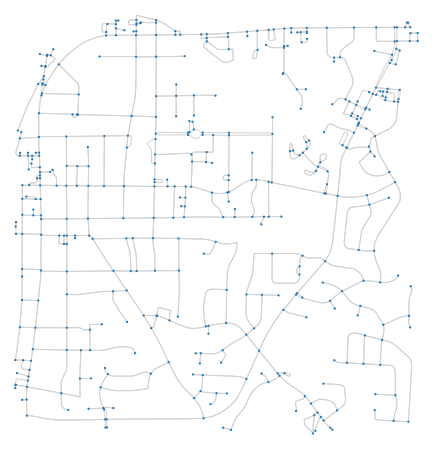

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
north, south, east, west = 35.572560,35.592245,-78.801327,-78.777637
G = ox.graph_from_bbox(north, south, east, west, network_type="drive_service")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
ox.plot.plot_graph(G, bgcolor='#FFFFFF', node_color=colors[0], edge_color='lightgray', node_size=5)

In [4]:
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

In [5]:
for i in G.nodes:
    print(i)

195399684
195399690
195413424
195413434
195417156
195417944
195417954
195419538
195419564
195419571
195419968
195426988
195426989
195426990
195434615
195434617
195438253
195438255
195438256
195438263
195438264
195438265
195438266
195438631
195438633
195438635
195443926
195447491
195447495
195447497
195447503
195447505
195447514
195447516
195447518
195447520
195455008
195455014
195456444
195459429
195459433
195459442
195459969
195459971
195459973
195460775
195460785
195460795
195460802
195461515
195461517
195462293
195462301
195462302
195463796
195464055
195464063
195464065
195466829
195466830
195466833
195467680
195467696
195471151
195475306
195481568
195488568
195488574
195488828
195489801
195489806
195497523
195500916
195500920
195500921
195500922
195501747
195501751
195507449
195507454
195507455
195507461
195507471
195515872
195516488
195516489
195517850
195517868
195519857
195519860
195532485
195532487
195538195
195538196
195541347
195541366
195541374
195541380
195541399
195550220


In [6]:
Nodes = []
for i in G.nodes:
    Nodes.append(i)

In [7]:
Nodes

[195399684,
 195399690,
 195413424,
 195413434,
 195417156,
 195417944,
 195417954,
 195419538,
 195419564,
 195419571,
 195419968,
 195426988,
 195426989,
 195426990,
 195434615,
 195434617,
 195438253,
 195438255,
 195438256,
 195438263,
 195438264,
 195438265,
 195438266,
 195438631,
 195438633,
 195438635,
 195443926,
 195447491,
 195447495,
 195447497,
 195447503,
 195447505,
 195447514,
 195447516,
 195447518,
 195447520,
 195455008,
 195455014,
 195456444,
 195459429,
 195459433,
 195459442,
 195459969,
 195459971,
 195459973,
 195460775,
 195460785,
 195460795,
 195460802,
 195461515,
 195461517,
 195462293,
 195462301,
 195462302,
 195463796,
 195464055,
 195464063,
 195464065,
 195466829,
 195466830,
 195466833,
 195467680,
 195467696,
 195471151,
 195475306,
 195481568,
 195488568,
 195488574,
 195488828,
 195489801,
 195489806,
 195497523,
 195500916,
 195500920,
 195500921,
 195500922,
 195501747,
 195501751,
 195507449,
 195507454,
 195507455,
 195507461,
 195507471,
 195

In [8]:
import pandas as pd
data = pd.DataFrame(Nodes)
data.rename(columns = {0:'Nodes'}, inplace = True)
data

Nodes
0     195399684
1     195399690
2     195413424
3     195413434
4     195417156
..          ...
441  9004761995
442  9022099054
443  9022099057
444  9022232331
445  9022232338

[446 rows x 1 columns]

In [9]:
lat1 = []
long1 = []
for i in Nodes:
    lat1.append(G.nodes[i].get('y'))
    long1.append(G.nodes[i].get('x'))

In [10]:
data['Latitude'] = lat1
data['Longitude'] = long1

In [11]:
data

Nodes   Latitude  Longitude
0     195399684  35.581115 -78.790297
1     195399690  35.581674 -78.789602
2     195413424  35.588570 -78.793069
3     195413434  35.591451 -78.795406
4     195417156  35.590071 -78.798730
..          ...        ...        ...
441  9004761995  35.575919 -78.790525
442  9022099054  35.575443 -78.785992
443  9022099057  35.575453 -78.785602
444  9022232331  35.584819 -78.788846
445  9022232338  35.584597 -78.788850

[446 rows x 3 columns]

In [12]:
import pandas as pd
from geopy import distance
import requests # to call the openmap/google apis
import json
import datetime
import math
import itertools
import numpy as np

In [13]:
import requests # to call the openmap/google apis
r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{data.loc[0, "Longitude"]},{data.loc[0, "Latitude"]};{data.loc[13, "Longitude"]},{data.loc[13, "Latitude"]}?overview=false""")

In [14]:
r.content

b'{"code":"Ok","waypoints":[{"hint":"MdijijTYo4oAAAAAOAAAAAAAAADCAAAAAAAAAPoSu0EAAAAAeNegQgAAAAA4AAAAAAAAAMIAAACzRQAAZ8FN-7vsHgJnwU37u-weAgAAHwY4uPSV","distance":0,"location":[-78.790297,35.581115],"name":"West Spring Street"},{"hint":"GtKjilLSo4oAAAAAFAAAAAAAAAAAAAAAAAAAADW_X0EAAAAAAAAAAAAAAAAUAAAAAAAAAAAAAACzRQAAKLtN-wIMHwIou037AgwfAgAAXws4uPSV","distance":0,"location":[-78.791896,35.589122],"name":"Stephenson Street"}],"routes":[{"legs":[{"steps":[],"weight":191.9,"distance":1349.5,"summary":"","duration":191.9}],"weight_name":"routability","weight":191.9,"distance":1349.5,"duration":191.9}]}'

In [15]:
import json
df3 = pd.DataFrame()
for j in data.index:
    list1 = []
    for i in data.index:
        r = requests.get(f"""http://router.project-osrm.org/route/v1/car/{data.loc[j, "Longitude"]},{data.loc[j, "Latitude"]};{data.loc[i, "Longitude"]},{data.loc[i, "Latitude"]}?overview=false""")        
        list1.append(json.loads(r.content)["routes"][0]["distance"])
    df3[j] = list1

In [16]:
data

Nodes   Latitude  Longitude
0     195399684  35.581115 -78.790297
1     195399690  35.581674 -78.789602
2     195413424  35.588570 -78.793069
3     195413434  35.591451 -78.795406
4     195417156  35.590071 -78.798730
..          ...        ...        ...
441  9004761995  35.575919 -78.790525
442  9022099054  35.575443 -78.785992
443  9022099057  35.575453 -78.785602
444  9022232331  35.584819 -78.788846
445  9022232338  35.584597 -78.788850

[446 rows x 3 columns]

In [17]:
path = nx.shortest_path(G, data['Nodes'].loc[0],data['Nodes'].loc[445], weight='travel_time')

In [18]:
def plot_path(lat, long, origin_point, destination_point):
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'grey')))
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    fig.update_layout(mapbox_style="carto-darkmatter",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 13})
    fig.show()

In [19]:
path

[195399684,
 195399690,
 195438266,
 195438265,
 195594848,
 195631804,
 6548460885,
 195461517,
 195631805,
 195631807,
 195631809,
 7819950877,
 195532485,
 9022232338]

In [20]:
df2 = pd.DataFrame()
df2 = df1.head(0)

In [21]:
data['Nodes'][0]

195399684

In [22]:
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])

In [23]:
df2

Nodes   Latitude  Longitude
0    1.953997e+08  35.581115 -78.790297
1    1.953997e+08  35.581674 -78.789602
22   1.954383e+08  35.581834 -78.791761
21   1.954383e+08  35.581848 -78.793255
121  1.955948e+08  35.582807 -78.793206
142  1.956318e+08  35.584299 -78.793169
264  6.548461e+09  35.584296 -78.792401
50   1.954615e+08  35.584295 -78.791994
143  1.956318e+08  35.584292 -78.791346
144  1.956318e+08  35.584284 -78.791026
145  1.956318e+08  35.584002 -78.789822
376  7.819951e+09  35.584009 -78.788925
90   1.955325e+08  35.584030 -78.788842
445  9.022232e+09  35.584597 -78.788850

In [24]:
df2.reset_index(inplace = True)

In [25]:
df2

index         Nodes   Latitude  Longitude
0       0  1.953997e+08  35.581115 -78.790297
1       1  1.953997e+08  35.581674 -78.789602
2      22  1.954383e+08  35.581834 -78.791761
3      21  1.954383e+08  35.581848 -78.793255
4     121  1.955948e+08  35.582807 -78.793206
5     142  1.956318e+08  35.584299 -78.793169
6     264  6.548461e+09  35.584296 -78.792401
7      50  1.954615e+08  35.584295 -78.791994
8     143  1.956318e+08  35.584292 -78.791346
9     144  1.956318e+08  35.584284 -78.791026
10    145  1.956318e+08  35.584002 -78.789822
11    376  7.819951e+09  35.584009 -78.788925
12     90  1.955325e+08  35.584030 -78.788842
13    445  9.022232e+09  35.584597 -78.788850

In [26]:
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])

In [27]:
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.loc[13]["Latitude"], df2.loc[13]["Longitude"])

In [28]:
plot_path(lat, long, origin_point, destination_point)

In [29]:
path = nx.shortest_path(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [30]:
path

[195532485,
 7819950877,
 195631809,
 195631807,
 195631805,
 195461517,
 6548460885,
 195631804,
 195623949,
 195631803,
 195631802,
 195594842,
 195438256,
 7732555376,
 195438255,
 8739204976,
 8739204978,
 195438253,
 195447514,
 195447505,
 195447503,
 195447497,
 195447495,
 8179010489,
 8179010484]

In [31]:
df2

index         Nodes   Latitude  Longitude
0       0  1.953997e+08  35.581115 -78.790297
1       1  1.953997e+08  35.581674 -78.789602
2      22  1.954383e+08  35.581834 -78.791761
3      21  1.954383e+08  35.581848 -78.793255
4     121  1.955948e+08  35.582807 -78.793206
5     142  1.956318e+08  35.584299 -78.793169
6     264  6.548461e+09  35.584296 -78.792401
7      50  1.954615e+08  35.584295 -78.791994
8     143  1.956318e+08  35.584292 -78.791346
9     144  1.956318e+08  35.584284 -78.791026
10    145  1.956318e+08  35.584002 -78.789822
11    376  7.819951e+09  35.584009 -78.788925
12     90  1.955325e+08  35.584030 -78.788842
13    445  9.022232e+09  35.584597 -78.788850

In [32]:
df2.loc[0]['Latitude']

35.5811149

In [33]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [34]:
path = nx.dijkstra_path(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [35]:
path

[195532485,
 7819950877,
 195631809,
 195631807,
 195631805,
 195461517,
 6548460885,
 195631804,
 195623949,
 195631803,
 195631802,
 195594842,
 195438256,
 7732555376,
 195438255,
 8739204976,
 8739204978,
 195438253,
 195447514,
 195447505,
 195447503,
 195447497,
 195447495,
 8179010489,
 8179010484]

In [36]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [37]:
path = nx.bellman_ford_path(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [38]:
path

[195532485,
 7819950877,
 195631809,
 195631807,
 195631805,
 195461517,
 6548460885,
 195631804,
 195623949,
 195631803,
 195631802,
 195594842,
 195438256,
 7732555376,
 195438255,
 8739204976,
 8739204978,
 195438253,
 195447514,
 195447505,
 195447503,
 195447497,
 195447495,
 8179010489,
 8179010484]

In [39]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [40]:
pred = nx.floyd_warshall_predecessor_and_distance(G)

In [52]:
path = nx.reconstruct_path(195399684,9022232338,pred)

In [53]:
data['Nodes'].loc[0]

195399684

In [54]:
data['Nodes'].loc[445]

9022232338

In [55]:
path = nx.astar_path(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [56]:
path

[195532485,
 7819950877,
 195631809,
 195631807,
 195631805,
 195461517,
 6548460885,
 195631804,
 195623949,
 195631803,
 195631802,
 195594842,
 195438256,
 7732555376,
 195438255,
 8739204976,
 8739204978,
 195438253,
 195447514,
 195447505,
 195447503,
 195447497,
 195447495,
 8179010489,
 8179010484]

In [57]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [58]:
path = nx.all_shortest_paths(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [59]:
path = [p for p in nx.all_shortest_paths(G, source=data['Nodes'].loc[90], target=data['Nodes'].loc[390])][0]

In [60]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [61]:
path = nx.bidirectional_dijkstra(G, data['Nodes'].loc[90],data['Nodes'].loc[390], weight='travel_time')

In [62]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path[1]:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [90]:
path = nx.shortest_path(G, data['Nodes'].loc[189],data['Nodes'].loc[423], weight='travel_time')

In [91]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [92]:
path = [p for p in nx.all_shortest_paths(G, source=data['Nodes'].loc[189], target=data['Nodes'].loc[423])][0]

In [93]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [94]:
path = nx.bellman_ford_path(G, data['Nodes'].loc[189],data['Nodes'].loc[423], weight='travel_time')

In [95]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

In [98]:
path = nx.bidirectional_dijkstra(G, data['Nodes'].loc[189],data['Nodes'].loc[423], weight='travel_time')

In [99]:
df2 = pd.DataFrame()
df2 = df1.head(0)
for j in path[1]:
    for i in data.index:
        if j == data['Nodes'][i]:
            df2 = df2.append(data.loc[i])
df2.reset_index(inplace = True)
long = [] 
lat = []  
for i in df2.index:
    long.append(df2.loc[i]["Longitude"])
    lat.append(df2.loc[i]["Latitude"])
origin_point = (df2.loc[0]["Latitude"], df2.loc[0]["Longitude"]) 
destination_point = (df2.iloc[-1]["Latitude"], df2.iloc[-1]["Longitude"]) 
plot_path(lat, long, origin_point, destination_point)

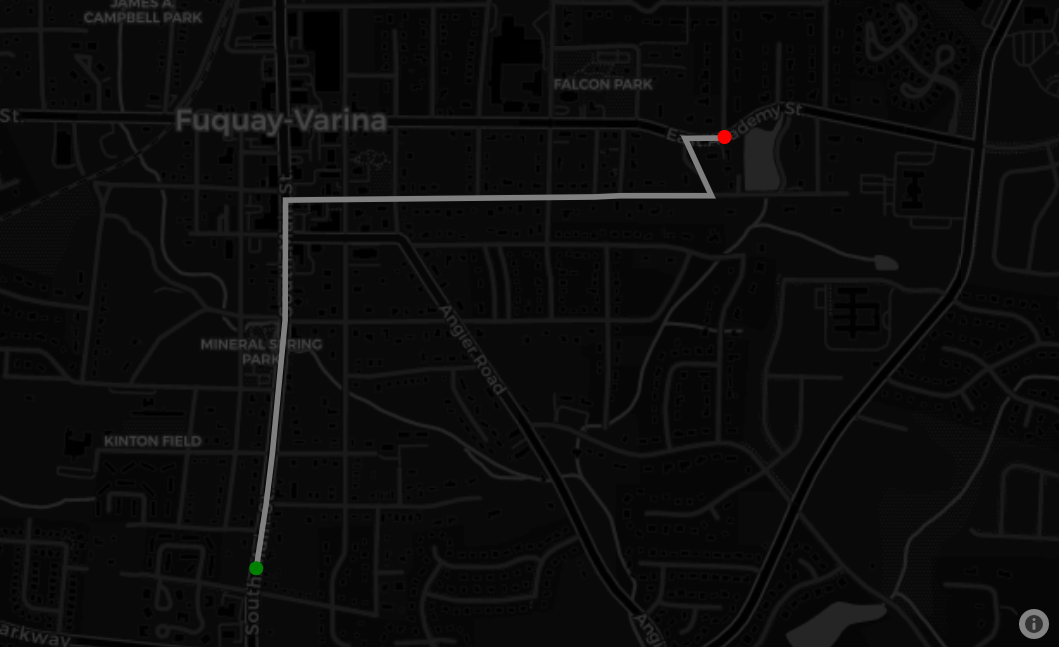

In [2]:
from IPython.display import Image
Image(filename = "path1-v1.png", width = 600, height = 300)

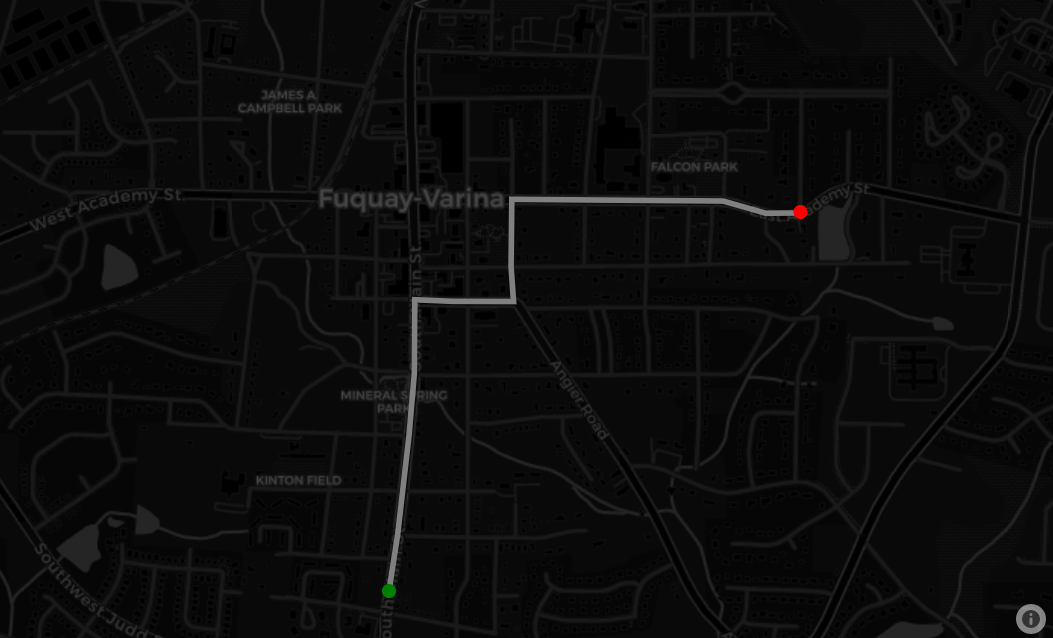

In [3]:
Image(filename = "path1-v2.png", width = 600, height = 300)

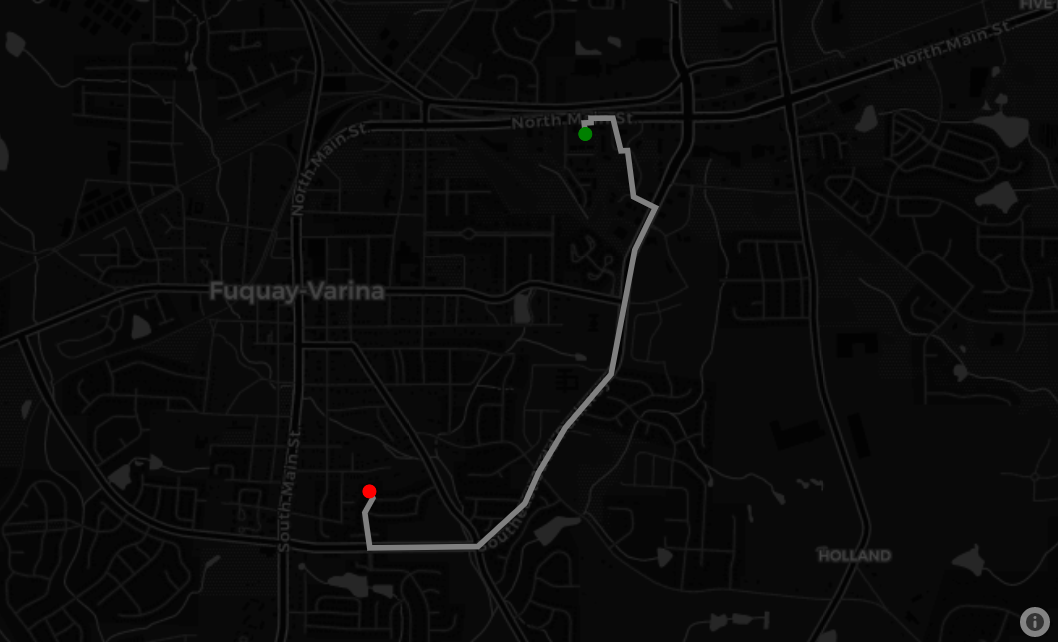

In [4]:
Image(filename = "path2-v1.png", width = 600, height = 300)

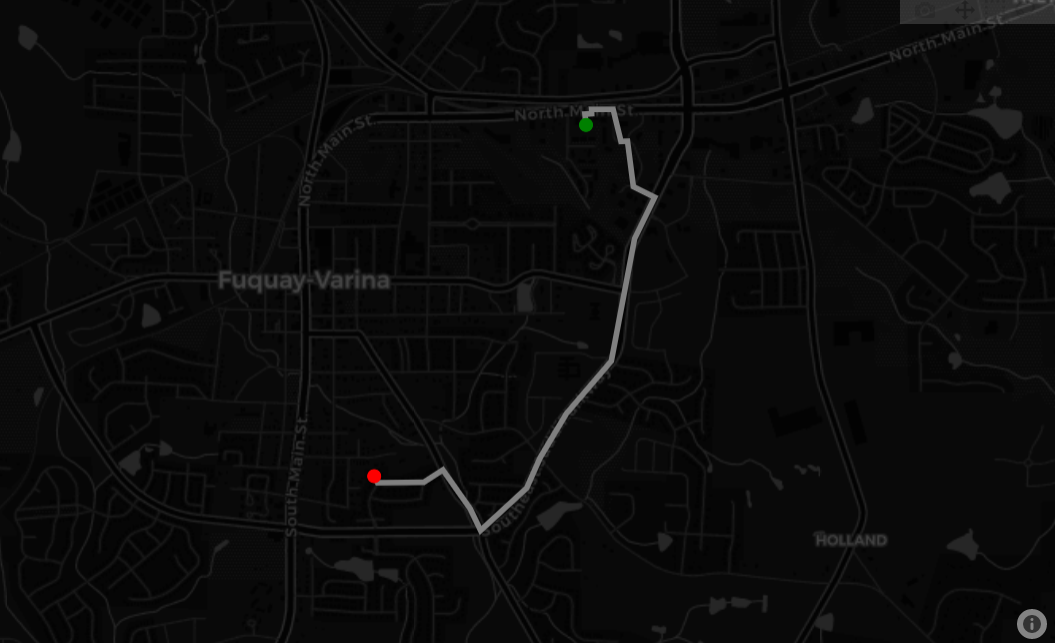

In [5]:
Image(filename = "path2-v2.png", width = 600, height = 300)